<h1><center>Tugas Besar 2 IF3170 Inteligensi Buatan</center></h1>
<h1><center>Eksplorasi scikit-learn pada Jupyter Notebook</center></h1>
**Anggota Kelompok**
1. Seperayo - 13516068
2. Aristoteles Swarna Wirahadi - 13516146

In [1]:
import graphviz 
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn import datasets, tree, svm
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# A. Membaca Data Iris & CSV

In [2]:
iris = datasets.load_iris()

print("Data Iris =")
print(iris.data)
print()
print()
print("Target Iris = ")
print(iris.target)

Data Iris =
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]


In [3]:
play_tennis = pd.read_csv('weather.nominal.csv')
print(play_tennis)

     outlook temperature humidity  windy play
0      sunny         hot     high  False   no
1      sunny         hot     high   True   no
2   overcast         hot     high  False  yes
3      rainy        mild     high  False  yes
4      rainy        cool   normal  False  yes
5      rainy        cool   normal   True   no
6   overcast        cool   normal   True  yes
7      sunny        mild     high  False   no
8      sunny        cool   normal  False  yes
9      rainy        mild   normal  False  yes
10     sunny        mild   normal   True  yes
11  overcast        mild     high   True  yes
12  overcast         hot   normal  False  yes
13     rainy        mild     high   True   no


# B. Skema Full Training & Model

## Naive Bayes

In [4]:
gnb = GaussianNB()
gnb.fit(iris.data,iris.target)

print("Model:")
print("1. Probabilitas setiap kelas:")
print(gnb.class_prior_)
print()
print("2. Rata-rata setiap fitur per kelas:")
print(gnb.theta_)
print()
print("3. Variansi setiap fitur per kelas:")
print(gnb.sigma_)

Model:
1. Probabilitas setiap kelas:
[0.33333333 0.33333333 0.33333333]

2. Rata-rata setiap fitur per kelas:
[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]

3. Variansi setiap fitur per kelas:
[[0.121764 0.140816 0.029556 0.010884]
 [0.261104 0.0965   0.2164   0.038324]
 [0.396256 0.101924 0.298496 0.073924]]


## Decision Tree

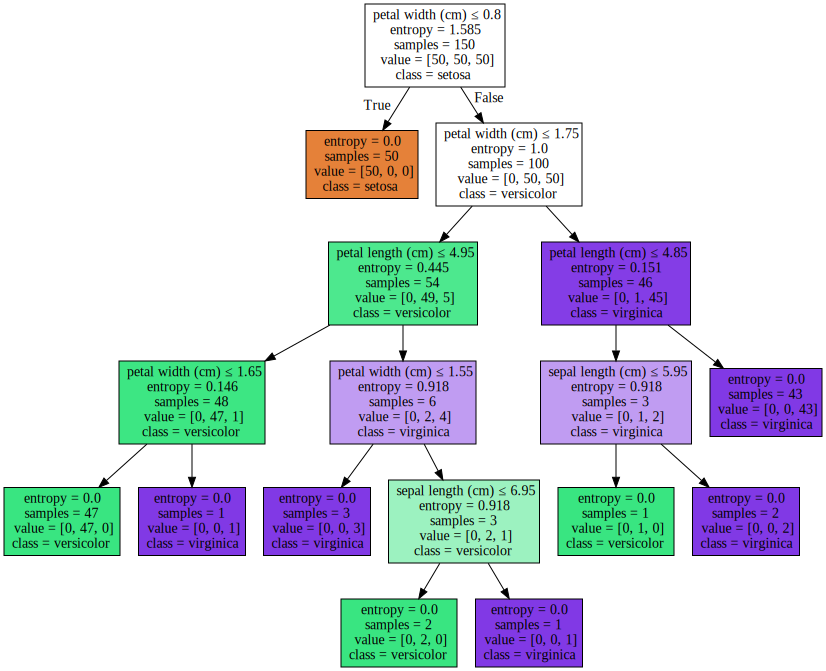

In [5]:
dtl = tree.DecisionTreeClassifier(criterion="entropy")
dtl2 = dtl.fit(iris.data, iris.target)
dtl2.predict(iris.data)

#visualisasi data model
dot_data = tree.export_graphviz(dtl, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=False,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

## k-Nearest Neighbors (kNN)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
# fit data dengan target
knn.fit(iris.data, iris.target)

print("knn tidak menghasilkan model")

knn.get_params()

knn tidak menghasilkan model


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Neural Network MLP

In [7]:
neuron = MLPClassifier(solver='lbfgs', alpha = 1e-5, 
                       hidden_layer_sizes=(5, 5), random_state = 1)
neuron.fit(iris.data, iris.target)

# Menampilkan model
print("Model:")

# Elemen ke i pada list merepresentasikan weight matrix untuk layer ke-i
print("1. Weight Matrices:")
print(neuron.coefs_)
print()

# Elemen ke i pada list merepresentasikan bias vector untuk layer ke-(i + 1)
print("2. Bias Vectors:")
print(neuron.intercepts_)

Model:
1. Weight Matrices:
[array([[-0.13549525, -0.70617706, -0.81626616, -0.09739896, -0.57681437],
       [-0.66567269, -1.6961518 , -0.25218479, -3.35497358,  0.06338407],
       [-0.13194775,  2.34263865, -0.48260165,  5.42458316, -0.77173156],
       [ 0.27835739,  5.10344605,  0.09583496,  2.64869349, -0.49297184]]), array([[ 0.61128933, -0.64281237, -0.71405508, -0.51146917,  0.58578453],
       [ 0.75593885, -0.81813288,  0.86290273,  3.14252919, -0.31296947],
       [-0.28578667,  0.28891055,  0.51837214, -0.74622469,  0.38750119],
       [ 5.02436472,  2.134994  , -1.17861411,  6.93488334, -0.53995981],
       [-0.08071869,  0.63295959, -0.31971449, -0.32875945, -0.57312663]]), array([[-6.06077396,  1.95459547,  2.84913835],
       [ 2.64312353, -0.09791849, -2.7332986 ],
       [ 6.75812341,  0.83855361, -7.55747343],
       [-6.76559417,  3.06675859,  3.26523033],
       [ 3.32995678,  1.06134833, -3.44558854]])]

2. Bias Vectors:
[array([ 0.49111382, -1.20240816, -0.30467

# C. Pembelajaran dengan split train 90%, test 10% dan confusion matrix

## Naive Bayes 

Model:
1. Probabilitas setiap kelas:
[0.33 0.33 0.33]

2. Rata-rata setiap fitur per kelas:
[[5.02 3.46 1.46 0.24]
 [5.93 2.78 4.26 1.32]
 [6.61 3.   5.56 2.03]]

3. Variansi setiap fitur per kelas:
[[0.12 0.12 0.03 0.01]
 [0.25 0.1  0.22 0.04]
 [0.38 0.09 0.31 0.07]]

Kinerja:
Akurasi:
0.8666666666666667

Presisi:
0.8666666666666667

Recall:
0.8666666666666667

Confusion matrix, without normalization
[[5 0 0]
 [0 4 1]
 [0 1 4]]

Normalized confusion matrix
[[1.  0.  0. ]
 [0.  0.8 0.2]
 [0.  0.2 0.8]]


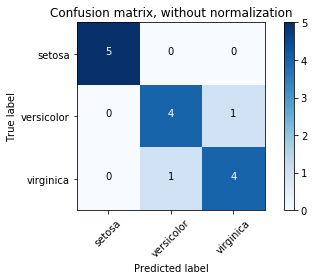

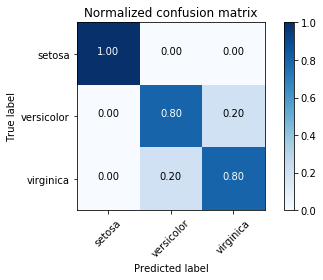

In [45]:
class_names = iris.target_names

X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.1)
y_temp = gnb.fit(X_train,y_train)
y_pred = y_temp.predict(X_test)

print("Model:")
print("1. Probabilitas setiap kelas:")
print(gnb.class_prior_)
print()
print("2. Rata-rata setiap fitur per kelas:")
print(gnb.theta_)
print()
print("3. Variansi setiap fitur per kelas:")
print(gnb.sigma_)
print()
print("Kinerja:")
print("Akurasi:")
print(accuracy_score(y_test, y_pred))
print()
print("Presisi:")
print(precision_score(y_test, y_pred, average='macro'))
print()
print("Recall:")
print(recall_score(y_test, y_pred, average='macro'))
print()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

print()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Decision Tree

Kinerja:
Akurasi:
1.0

Presisi:
1.0

Recall:
1.0

Confusion matrix, without normalization
[[3 0 0]
 [0 8 0]
 [0 0 4]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


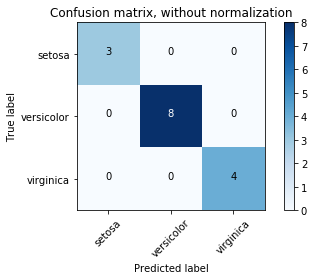

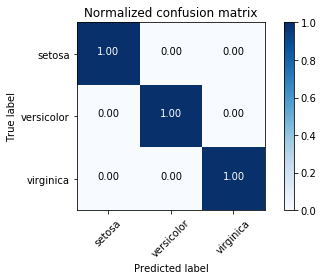

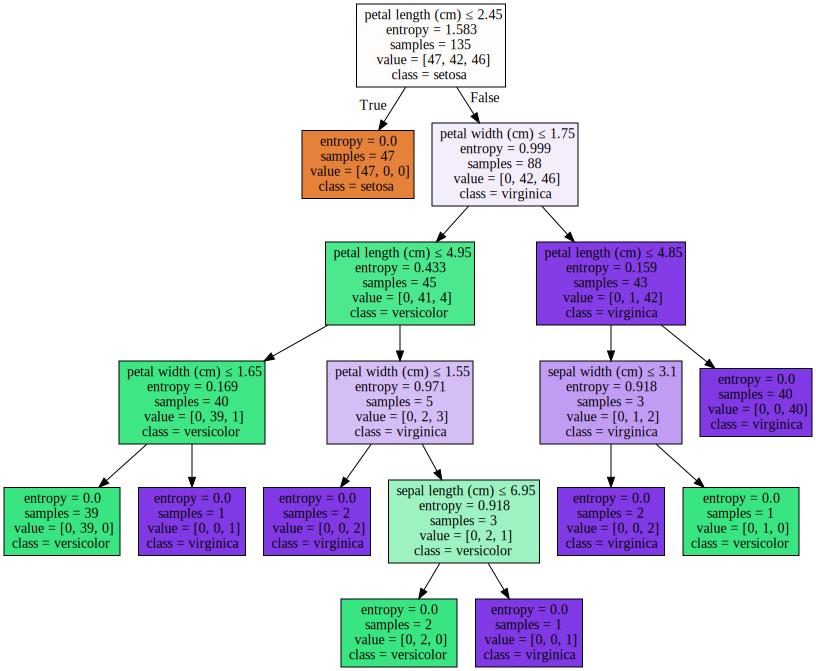

In [52]:
y_temp = dtl.fit(X_train,y_train)
y_pred = y_temp.predict(X_test)

print("Kinerja:")
print("Akurasi:")
print(accuracy_score(y_test, y_pred))
print()
print("Presisi:")
print(precision_score(y_test, y_pred, average='macro'))
print()
print("Recall:")
print(recall_score(y_test, y_pred, average='macro'))
print()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Draw Tree
dtl.fit(X_train, y_train)
dot_data = tree.export_graphviz(dtl, out_file = None,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, rounded = False,
                                special_characters = True)
graph = graphviz.Source(dot_data)

# Graphviz
graph

## k-Nearest Neighbors (kNN)

Kinerja:
Akurasi:
0.9333333333333333

Presisi:
0.9444444444444445

Recall:
0.9333333333333332

Confusion matrix, without normalization
[[5 0 0]
 [0 5 0]
 [0 1 4]]
Normalized confusion matrix
[[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.2 0.8]]


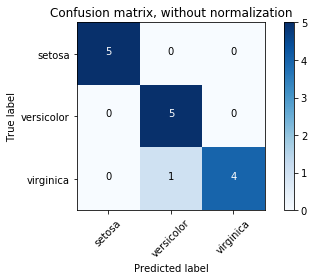

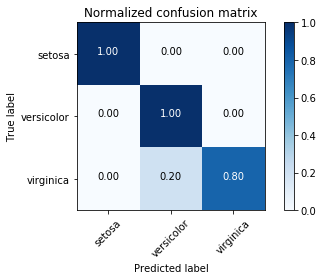

In [47]:
y_temp = knn.fit(X_train,y_train)
y_pred = y_temp.predict(X_test)

print("Kinerja:")
print("Akurasi:")
print(accuracy_score(y_test, y_pred))
print()
print("Presisi:")
print(precision_score(y_test, y_pred, average='macro'))
print()
print("Recall:")
print(recall_score(y_test, y_pred, average='macro'))
print()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Neural Network MLP

Kinerja:
Akurasi:
1.0

Presisi:
1.0

Recall:
1.0

Confusion matrix, without normalization
[[3 0 0]
 [0 8 0]
 [0 0 4]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


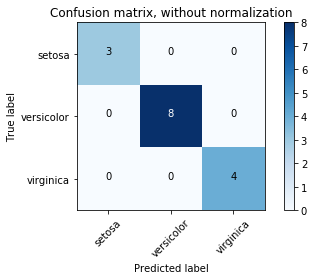

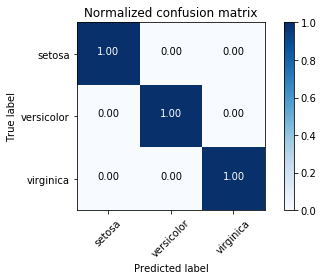

In [51]:
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=0)
y_temp = neuron.fit(X_train,y_train)
y_pred = y_temp.predict(X_test)

print("Kinerja:")
print("Akurasi:")
print(accuracy_score(y_test, y_pred))
print()
print("Presisi:")
print(precision_score(y_test, y_pred, average='macro'))
print()
print("Recall:")
print(recall_score(y_test, y_pred, average='macro'))
print()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# D. Pembelajaran dengan skema 10-fold cross validation beserta kinerja

## Naive Bayes 

In [49]:
score = cross_val_score(gnb, iris.data, iris.target, cv=10)

# Menampilkan kinerja
print("Kinerja:")
print()
for i in range(10):
    print("Fold " + str(i + 1) + ":", score[i])
print()
print("Rata-rata:", np.mean(score))

Kinerja:

Fold 1: 0.9333333333333333
Fold 2: 0.9333333333333333
Fold 3: 1.0
Fold 4: 0.9333333333333333
Fold 5: 0.9333333333333333
Fold 6: 0.9333333333333333
Fold 7: 0.8666666666666667
Fold 8: 1.0
Fold 9: 1.0
Fold 10: 1.0

Rata-rata: 0.9533333333333334


## Decision Tree

In [50]:
score = cross_val_score(dtl, iris.data, iris.target, cv=10)

# Menampilkan kinerja
print("Kinerja:")
for i in range(10):
    print("Fold-" + str(i + 1) + ":", score[i])
print()
print("Rata-rata:", np.mean(score))

Kinerja:
Fold-1: 1.0
Fold-2: 0.9333333333333333
Fold-3: 1.0
Fold-4: 0.9333333333333333
Fold-5: 0.9333333333333333
Fold-6: 0.8666666666666667
Fold-7: 0.9333333333333333
Fold-8: 1.0
Fold-9: 1.0
Fold-10: 1.0

Rata-rata: 0.96


## k-Nearest Neighbors (kNN)

In [23]:
score = cross_val_score(knn, iris.data, iris.target, cv=10)

# Menampilkan kinerja
print("Kinerja:")
for i in range(10):
    print("Fold-" + str(i + 1) + ":", score[i])
print()
print("Rata-rata:", np.mean(score))

Kinerja:
Fold-1: 1.0
Fold-2: 0.9333333333333333
Fold-3: 1.0
Fold-4: 1.0
Fold-5: 0.8666666666666667
Fold-6: 0.9333333333333333
Fold-7: 0.9333333333333333
Fold-8: 1.0
Fold-9: 1.0
Fold-10: 1.0

Rata-rata: 0.9666666666666668


## Neural Network MLP

In [24]:
score = cross_val_score(neuron, iris.data, iris.target, cv=10)

# Menampilkan kinerja
print("Kinerja:")
for i in range(10):
    print("Fold-" + str(i + 1) + ":", score[i])
print()
print("Rata-rata:", np.mean(score))

Kinerja:
Fold-1: 1.0
Fold-2: 1.0
Fold-3: 1.0
Fold-4: 1.0
Fold-5: 0.9333333333333333
Fold-6: 1.0
Fold-7: 0.9333333333333333
Fold-8: 0.9333333333333333
Fold-9: 1.0
Fold-10: 1.0

Rata-rata: 0.9800000000000001


# E. Menyimpan Hipotesis

In [36]:
print("Test Score with Naive Bayes", gnb.score(X_test,y_test))
joblib.dump(gnb, 'iris_NB.mdl')
print("Test Score with Decision Tree", dtl.score(X_test,y_test))
joblib.dump(dtl, 'iris_DT.mdl')
print("Test Score with k-Nearest Neighbor", knn.score(X_test,y_test))
joblib.dump(knn, 'iris_kNN.mdl')
print("Test Score with MLP", neuron.score(X_test,y_test))
joblib.dump(neuron, 'iris_MLP.mdl')

Test Score with Naive Bayes 1.0
Test Score with Decision Tree 1.0
Test Score with k-Nearest Neighbor 1.0
Test Score with MLP 0.4666666666666667


['iris_MLP.mdl']

# F. Membaca Hipotesis dari File Eksternal

In [37]:
gnb = joblib.load('iris_NB.mdl')
result_gnb = gnb.score(X_test, y_test)
print("Test Score with Naive Bayes =", result_gnb)
dtl = joblib.load('iris_DT.mdl')
result_dtl = dtl.score(X_test, y_test)
print("Test Score with Decision Tree =", result_dtl)
knn = joblib.load('iris_kNN.mdl')
result_knn = knn.score(X_test, y_test)
print("Test Score with k-Nearest Neighbor =", result_knn)
neuron = joblib.load('iris_MLP.mdl')
result_neuron = neuron.score(X_test, y_test)
print("Test Score with MLP =", result_neuron)

Test Score with Naive Bayes = 1.0
Test Score with Decision Tree = 1.0
Test Score with k-Nearest Neighbor = 1.0
Test Score with MLP = 0.4666666666666667


# G. Membuat Instance Baru

In [41]:
new_instance = [1, 2, 3, 4]
new_instance = np.array([new_instance])
                
print("Instance baru:")
for i in range(4):
    print(iris.feature_names[i] + ":", new_instance[0][i])

Instance baru:
sepal length (cm): 1
sepal width (cm): 2
petal length (cm): 3
petal width (cm): 4


# H. Klasifikasi Dari Hipotesis

In [44]:
#Hasil klasifikasi NaiveBayes untuk instans baru
print("Menurut Naive Bayes, Intance ini tergolong =", iris.target_names[gnb.predict(new_instance)][0])

#Hasil klasifikasi Decisiontree untuk instans baru
print("Menurut Decision Tree, Intance ini tergolong =", iris.target_names[dtl.predict(new_instance)][0])

#Hasil klasifikasi kNN untuk instans baru
print("Menurut k-Nearest Neighbor, Intance ini tergolong =", iris.target_names[knn.predict(new_instance)][0])

#Hasil klasifikasi MLP untuk instans baru
print("Menurut MLP, Intance ini tergolong =", iris.target_names[neuron.predict(new_instance)][0])

Menurut Naive Bayes, Intance ini tergolong = virginica
Menurut Decision Tree, Intance ini tergolong = virginica
Menurut k-Nearest Neighbor, Intance ini tergolong = versicolor
Menurut MLP, Intance ini tergolong = setosa
